In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

In [2]:
df1 = pd.read_csv("word2vec_train.csv",index_col=0)
df2 = pd.read_csv("word2vec_test.csv",index_col=0)

In [3]:
dfn = [df1,df2]
dfn = pd.concat(dfn,ignore_index=True)

In [4]:
dfn.head(10)

0         1         2         3         4         5         6  \
0 -0.693235  1.946882 -1.016376  1.277738 -2.104296  0.051387  0.903378   
1 -1.294396  1.570851 -0.222549 -0.196188  1.636866  0.272979  0.880825   
2 -1.385391 -1.009145  0.398964 -0.119334 -0.542070  0.045808 -0.172949   
3 -1.409295  1.635610 -0.454240 -1.083456  2.247026 -0.298414  1.514813   
4 -0.400732  0.421474 -0.208392  0.625372 -0.518593  0.870395 -1.032310   
5 -1.201873  0.268308  0.344585 -0.119922 -0.519406 -0.378318  0.357141   
6 -0.097954 -0.107030 -1.545372  2.230879 -0.166601 -2.829212  2.749291   
7  0.612322 -1.068908  1.138345 -1.927093 -0.642531 -0.041410 -0.631748   
8 -0.212091 -1.861187  2.385541 -1.182657 -0.250899 -0.093904  0.133446   
9  1.259844 -0.503375  0.152125  0.585143 -1.407251 -1.651828 -0.779239   

          7         8         9  ...       140       141       142       143  \
0 -2.438305  0.756109 -0.014458  ... -0.542042 -1.246860  2.453700  1.007172   
1 -1.048883 -2.433178  0.519607  ...  1.191034  0.211538 -1.067466 -0.998267   
2 -0.255560  0.697136 -0.465232  ... -0.734819 -0.005878  0.632065 -0.142334   
3 -0.233887 -0.567362 -0.202964  ...  1.710343  0.976205  2.322763  0.843666   
4 -0.791752 -0.987059  1.070332  ...  0.526311 -1.587409  0.583929  0.274430   
5  0.171801 -0.850996  0.361896  ...  0.878503  0.928193  0.161611 -0.360664   
6 -1.639586  0.260221 -3.131609  ... -0.632376  0.947540 -0.387521 -0.082995   
7  1.240412  1.160689 -0.885704  ...  1.522222  0.305590  1.087970 -0.717696   
8  0.830386  0.668779 -0.372896  ... -1.028990 -0.280274 -0.780920  0.397916   
9 -0.068556  1.033494  0.935108  ... -0.651671 -0.927118 -0.325155 -0.448888   

        144       145       146       147       148       149  
0  0.351623 -2.404817  0.357724  1.238521 -1.003293  1.683496  
1 -0.665334 -0.337884 -2.607434 -1.466835 -1.856928  0.349097  
2  0.269161  0.973430 -0.667139  1.298579  0.487449  0.684302  
3 -0.165172  0.889108 -0.212432 -1.107378  2.579809 -1.354311  
4  1.526658  1.055244 -0.122826 -1.641447  0.350267 -0.207850  
5 -1.384156  1.904071  0.532881 -0.980699  0.937217 -0.319921  
6 -1.417576 -1.289766  1.066593 -1.422497 -0.821909  1.379710  
7 -0.585156  1.664401  0.263064  0.561267 -0.095500 -0.523332  
8  0.357442 -0.204855  1.586988  0.097375 -0.307832 -0.432253  
9  0.133222  0.458039 -0.962545  0.937804 -0.391821 -0.838860  

[10 rows x 150 columns]

In [5]:
dfn.shape

(2079, 150)

In [6]:
dfn.columns = dfn.columns.map(int)

In [7]:
# log_files_path_data = 'Data/'
# fmain = pd.read_csv(log_files_path_data + "Data_merged.csv",index_col=0)
dfmain =  pd.read_csv("Data_merged.csv",index_col=0)
dfmain.shape

(2079, 24)

In [8]:
dfmain["Close Price"].head()

0    1284.91
1    1261.52
2    1262.90
3    1252.31
4    1273.70
Name: Close Price, dtype: float64

In [10]:

Close = dfmain["Close Price"]
# Open = dfmain["Open Price"]
# Low = dfmain["Low Price"]
# High = dfmain["High Price"]

In [11]:
dfn[150] = Close
# dfn[151] = Open
# dfn[152] = Low
# dfn[153] = High

In [12]:
## DataFrame "News_Word2Vec" with Close 
dfn.head()

0         1         2         3         4         5         6    \
0 -0.693235  1.946882 -1.016376  1.277738 -2.104296  0.051387  0.903378   
1 -1.294396  1.570851 -0.222549 -0.196188  1.636866  0.272979  0.880825   
2 -1.385391 -1.009145  0.398964 -0.119334 -0.542070  0.045808 -0.172949   
3 -1.409295  1.635610 -0.454240 -1.083456  2.247026 -0.298414  1.514813   
4 -0.400732  0.421474 -0.208392  0.625372 -0.518593  0.870395 -1.032310   

        7         8         9    ...       141       142       143       144  \
0 -2.438305  0.756109 -0.014458  ... -1.246860  2.453700  1.007172  0.351623   
1 -1.048883 -2.433178  0.519607  ...  0.211538 -1.067466 -0.998267 -0.665334   
2 -0.255560  0.697136 -0.465232  ... -0.005878  0.632065 -0.142334  0.269161   
3 -0.233887 -0.567362 -0.202964  ...  0.976205  2.322763  0.843666 -0.165172   
4 -0.791752 -0.987059  1.070332  ... -1.587409  0.583929  0.274430  1.526658   

        145       146       147       148       149      150  
0 -2.404817  0.357724  1.238521 -1.003293  1.683496  1284.91  
1 -0.337884 -2.607434 -1.466835 -1.856928  0.349097  1261.52  
2  0.973430 -0.667139  1.298579  0.487449  0.684302  1262.90  
3  0.889108 -0.212432 -1.107378  2.579809 -1.354311  1252.31  
4  1.055244 -0.122826 -1.641447  0.350267 -0.207850  1273.70  

[5 rows x 151 columns]

In [13]:
dfn.tail()

0         1         2         3         4         5         6    \
2074 -0.975791 -1.510473  1.171996  0.177866  1.797874 -0.259795  0.910293   
2075 -1.296227  1.522789 -0.286289 -0.153512  1.566502  0.372012  0.955639   
2076  0.400181  0.512664 -2.372005  0.230187 -0.215300  1.435324 -0.870201   
2077 -0.232141 -1.893216  2.625096 -1.176361 -0.241307 -0.044827  0.201112   
2078  0.401320  1.001927 -0.348923  1.732610  0.739051 -0.162655  2.330336   

           7         8         9    ...       141       142       143  \
2074  1.647067  0.982370  1.452966  ... -1.652431 -1.292540 -0.884337   
2075 -1.087208 -2.350483  0.506731  ...  0.267031 -1.194251 -0.991899   
2076 -1.081482 -1.744436 -0.052541  ...  0.692040 -1.536004 -0.918870   
2077  0.980463  0.749251 -0.303272  ... -0.314231 -0.754407  0.519896   
2078  0.401579  0.300272 -1.055878  ...  1.442370 -0.202725 -1.084657   

           144       145       146       147       148       149      150  
2074  0.576865 -1.624375 -1.166259 -0.291542 -0.533419 -0.321748  2146.10  
2075 -0.618034 -0.303658 -2.766279 -1.432624 -1.590259  0.269589  2159.93  
2076  0.707435  1.743173 -2.161547 -0.176135  0.507301 -0.186727  2171.37  
2077  0.303930 -0.270839  1.611312  0.116989 -0.247085 -0.539239  2151.13  
2078  0.103652 -0.449726 -0.671449 -0.683973  1.073076  1.800789  2168.27  

[5 rows x 151 columns]

In [14]:
dfn.shape

(2079, 151)

In [15]:
df = dfn.copy() # Copy from the input dataset

In [16]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10

In [17]:
# number of different stocks: here is only one index of S&P 500
#print('\nnumber of different stocks: ', len(list(set(df.symbol))))
#print(list(set(df.symbol))[:10])
df.tail()

0         1         2         3         4         5         6    \
2074 -0.975791 -1.510473  1.171996  0.177866  1.797874 -0.259795  0.910293   
2075 -1.296227  1.522789 -0.286289 -0.153512  1.566502  0.372012  0.955639   
2076  0.400181  0.512664 -2.372005  0.230187 -0.215300  1.435324 -0.870201   
2077 -0.232141 -1.893216  2.625096 -1.176361 -0.241307 -0.044827  0.201112   
2078  0.401320  1.001927 -0.348923  1.732610  0.739051 -0.162655  2.330336   

           7         8         9    ...       141       142       143  \
2074  1.647067  0.982370  1.452966  ... -1.652431 -1.292540 -0.884337   
2075 -1.087208 -2.350483  0.506731  ...  0.267031 -1.194251 -0.991899   
2076 -1.081482 -1.744436 -0.052541  ...  0.692040 -1.536004 -0.918870   
2077  0.980463  0.749251 -0.303272  ... -0.314231 -0.754407  0.519896   
2078  0.401579  0.300272 -1.055878  ...  1.442370 -0.202725 -1.084657   

           144       145       146       147       148       149      150  
2074  0.576865 -1.624375 -1.166259 -0.291542 -0.533419 -0.321748  2146.10  
2075 -0.618034 -0.303658 -2.766279 -1.432624 -1.590259  0.269589  2159.93  
2076  0.707435  1.743173 -2.161547 -0.176135  0.507301 -0.186727  2171.37  
2077  0.303930 -0.270839  1.611312  0.116989 -0.247085 -0.539239  2151.13  
2078  0.103652 -0.449726 -0.671449 -0.683973  1.073076  1.800789  2168.27  

[5 rows x 151 columns]

In [18]:
df.describe()

0             1             2             3             4    \
count  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03   
mean   2.949487e-15  2.610279e-15  1.443984e-16  1.298731e-16 -3.853473e-16   
std    1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00   
min   -2.202072e+00 -1.928557e+00 -2.506355e+00 -2.602745e+00 -2.158812e+00   
25%   -5.446813e-01 -6.226126e-01 -6.347662e-01 -7.395895e-01 -5.805722e-01   
50%    1.573960e-01 -1.070298e-01  2.005961e-02  1.324424e-04 -2.110853e-01   
75%    5.113036e-01  5.720514e-01  7.164087e-01  6.932063e-01  5.744967e-01   
max    3.094198e+00  2.518657e+00  2.650999e+00  2.241666e+00  2.284225e+00   

                5             6             7             8             9    \
count  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03   
mean   4.174738e-15 -3.810751e-16 -9.125296e-16  2.792272e-15  2.358223e-15   
std    1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00   
min   -2.871835e+00 -2.080195e+00 -2.438305e+00 -2.467344e+00 -3.208441e+00   
25%   -3.783182e-01 -7.337600e-01 -7.589088e-01 -7.337470e-01 -5.403080e-01   
50%   -5.319957e-02 -6.893380e-02 -5.365183e-02  2.861137e-01 -6.282238e-02   
75%    6.533285e-01  8.786784e-01  8.097764e-01  7.721071e-01  5.105898e-01   
max    2.054359e+00  2.852016e+00  2.584999e+00  1.667527e+00  2.576878e+00   

       ...           141           142           143           144  \
count  ...  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03   
mean   ... -2.098476e-15  2.801671e-15 -1.191073e-15  3.084487e-15   
std    ...  1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00   
min    ... -1.997349e+00 -2.503598e+00 -2.077386e+00 -1.579969e+00   
25%    ... -8.627162e-01 -7.035899e-01 -8.453331e-01 -9.554757e-01   
50%    ...  1.537853e-01  4.765701e-02 -4.322748e-02  1.125591e-01   
75%    ...  8.986527e-01  6.392417e-01  6.943581e-01  7.557056e-01   
max    ...  1.757482e+00  2.479248e+00  2.153312e+00  2.366229e+00   

                145           146           147           148           149  \
count  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03  2.079000e+03   
mean   6.894384e-15 -1.737908e-15  6.707264e-16  9.467068e-16  1.033858e-16   
std    1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00  1.000241e+00   
min   -2.494120e+00 -2.780901e+00 -2.003380e+00 -1.856928e+00 -1.862404e+00   
25%   -6.382822e-01 -6.344530e-01 -8.538694e-01 -7.934392e-01 -8.773485e-01   
50%   -6.901295e-02  1.026352e-01  2.620650e-02  7.767801e-02 -1.223083e-01   
75%    6.122461e-01  7.203516e-01  8.678706e-01  4.654742e-01  6.838829e-01   
max    1.988337e+00  2.393828e+00  1.944355e+00  2.614033e+00  2.182481e+00   

               150  
count  2079.000000  
mean   1510.099153  
std     414.400699  
min     676.530000  
25%    1173.705000  
50%    1402.890000  
75%    1940.895000  
max    2190.150000  

[8 rows x 151 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Columns: 151 entries, 0 to 150
dtypes: float64(151)
memory usage: 2.4 MB


In [20]:
df.shape

(2079, 151)

In [21]:
# df6.info()

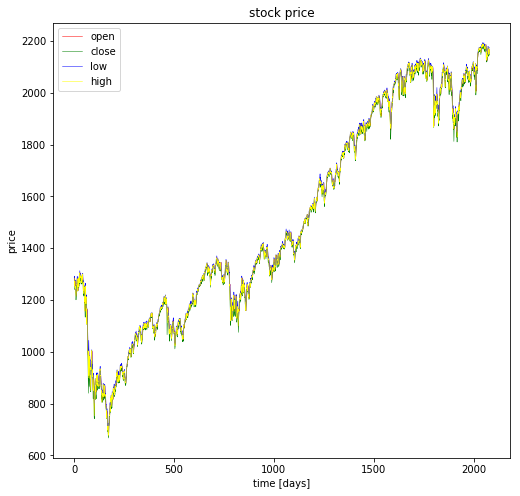

In [22]:
## This observation is only for raw_dataset, not from autoencoder result
## 'Close Price', 'Open Price','High Price','Low Price',
plt.figure(figsize=(18, 8));
plt.subplot(1,2,1);
plt.plot(dfmain['Open Price'], color='red', label='open',linewidth=0.5)
plt.plot(dfmain['Low Price'], color='green', label='close',linewidth=0.5)
plt.plot(dfmain['High Price'], color='blue', label='low',linewidth=0.5)
plt.plot(dfmain['Close Price'], color='yellow', label='high',linewidth=0.5)
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()


## 3. Manipulate data

In [23]:
## Spring 2019
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    scaler = [None] * df.shape[1]
    for i in range(df.shape[1]):
        scaler[i] = min_max_scaler.fit(df[i].values.reshape(-1,1))
        df[i] = scaler[i].transform(df[i].values.reshape(-1,1)) 
#     for i in range(150,155):
#         scaler[i] = min_max_scaler.fit(df[i].values.reshape(-1,1))
#         df[i] = scaler[i].transform(df[i].values.reshape(-1,1))          
    return scaler, df

In [24]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    print(len(data[0][0])) ## (len-20)*seq_len* features(include close)
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [25]:
[x_train, y_train, x_valid, y_valid, x_test, y_test] = load_data(df, 20)

151


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# df6 = pd.read_csv("Y5levelWT3layer18-14-10.csv",header=None)

In [26]:
# choose one stock
df_stock = df.copy()
#df_stock.drop(['symbol'],1,inplace=True)
# df_stock.drop(['Volume'],1,inplace=True)
# df_stock.drop(['Adj Close'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
min_max_scaler, df_stock_norm = normalize_data(df_stock_norm)
# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
# x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
151
x_train.shape =  (1647, 19, 151)
y_train.shape =  (1647, 151)
x_valid.shape =  (206, 19, 151)
y_valid.shape =  (206, 151)
x_test.shape =  (206, 19, 151)
y_test.shape =  (206, 151)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## 4. Model and validate data

In [27]:

# - RNNs with basic, LSTM, GRU cells
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)

[   0    1    2 ... 1644 1645 1646]


In [34]:
# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size       
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [35]:
# parameters
# index_to_begin = 150
# index_to_stop = 15

n_steps = seq_len-1 
n_inputs = 151
n_neurons = 512 # number of units is 200
n_outputs = 151 # Was 11, should be 1 as we are only interested in close prices
n_layers = 5  # layers should be 5
learning_rate = 0.0005
batch_size = 50 # batch size should be 60
n_epochs = 150  # should be 5000
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) #[index_to_begin:index_to_stop]) 
# loss function = mean squared error 
#I made loss function only dependend on the indexes that we are interested in, instead of all variables

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%d epochs: MSE train/valid = %.6f/%.6f'%(
                int(iteration*batch_size/train_set_size), mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0 epochs: MSE train/valid = 0.255263/0.258949
4 epochs: MSE train/valid = 0.046881/0.048623
9 epochs: MSE train/valid = 0.047083/0.048694
14 epochs: MSE train/valid = 0.047152/0.048751
19 epochs: MSE train/valid = 0.046859/0.048488
24 epochs: MSE train/valid = 0.046941/0.048309
29 epochs: MSE train/valid = 0.046663/0.047711
34 epochs: MSE train/valid = 0.046713/0.047594
39 epochs: MSE train/valid = 0.046657/0.047450
44 epochs: MSE train/valid = 0.046551/0.047563
49 epochs: MSE train/valid = 0.046614/0.047544
54 epochs: MSE train/valid = 0.046584/0.047496
59 epochs: MSE train/valid = 0.046619/0.047801
64 epochs: MSE train/valid = 0.046351/0.047442
69 epochs: MSE train/valid = 0.046293/0.047620
74 epochs: MSE train/valid = 0.046344/0.048935
79 epochs: MSE train/valid = 0.046143/0.047855
84 epochs: MSE train/valid = 0.046188/0.048066
89 epochs: MSE train/valid = 0.046285/0.048815
94 epochs: MSE train/valid = 0.045705/0.048167
99 epochs: MSE train/valid = 0.045406/0.048548
104 epochs: MSE 

In [36]:
# # 5. Predictions <a class="anchor" id="5-bullet"></a> 

#De-normalize the values
for i in range(y_train.shape[1]):
    y_train[:,i] = min_max_scaler[i].inverse_transform(y_train[:,i].reshape(1,-1))
    y_train_pred[:,i] = min_max_scaler[i].inverse_transform(y_train_pred[:,i].reshape(1,-1))
    y_valid[:,i] = min_max_scaler[i].inverse_transform(y_valid[:,i].reshape(1,-1))
    y_valid_pred[:,i] = min_max_scaler[i].inverse_transform(y_valid_pred[:,i].reshape(1,-1))
    y_test[:,i] = min_max_scaler[i].inverse_transform(y_test[:,i].reshape(1,-1))
    y_test_pred[:,i] = min_max_scaler[i].inverse_transform(y_test_pred[:,i].reshape(1,-1))


correct sign prediction for close - (close-1) price for train/valid/test: 0.66/0.52/0.49


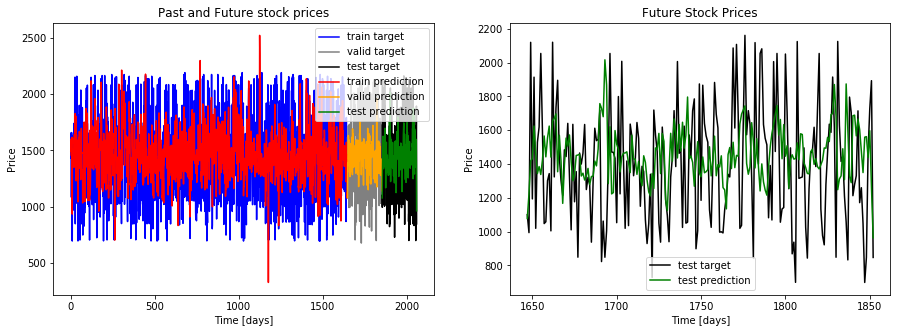

In [37]:
ft = 10  # 10=close, 11=open, 12=high, 13=low
## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Past and Future stock prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
                  y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Future Stock Prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');


#adjust the columns of the variables in order to get the right accuracy prediction. 
sign_correct_train = np.sum(np.equal(np.sign(y_train[1:,ft]-y_train[:len(y_train)-1,ft]),
            np.sign(y_train_pred[1:,ft]-y_train_pred[:len(y_train_pred)-1,ft])).astype(int))
corr_price_development_train = sign_correct_train / y_train.shape[0]

sign_correct_valid = np.sum(np.equal(np.sign(y_valid[1:,ft]-y_valid[:len(y_valid)-1,ft]),
            np.sign(y_valid_pred[1:,ft]-y_valid_pred[:len(y_valid_pred)-1,ft])).astype(int))
corr_price_development_valid = sign_correct_valid / y_valid.shape[0]

sign_correct_test = np.sum(np.equal(np.sign(y_test[1:,ft]-y_test[:len(y_test)-1,ft]),
            np.sign(y_test_pred[1:,ft]-y_test_pred[:len(y_test_pred)-1,ft])).astype(int))
corr_price_development_test = sign_correct_test / y_test.shape[0]

print('correct sign prediction for close - (close-1) price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()

In [38]:
#Test the significance level of our correct sign prediction
significance_train = scipy.stats.binom_test(sign_correct_train, n=y_train.shape[0], p=0.50)
significance_valid = scipy.stats.binom_test(sign_correct_valid, n=y_valid.shape[0], p=0.50)
significance_test = scipy.stats.binom_test(sign_correct_test, n=y_test.shape[0], p=0.50)
print(significance_train)
print(significance_valid)
print(significance_test)

2.3559782342636874e-39
0.5307221711313497
0.7276586764549022


In [39]:
#Calculate MAPE
mape_train = np.mean(abs(np.divide(y_train_pred,y_train)))
mape_valid = np.mean(abs(np.divide(y_valid_pred, y_valid)))
mape_test = np.mean(abs(np.divide(y_test_pred, y_test)))
print('MAPE for train/validation/test set : %.2f/%.2f/%.2f'%(mape_train, mape_valid, mape_test))

MAPE for train/validation/test set : 1.05/1.07/1.06


In [40]:
#Store the actual values and predictions in a dataframe and export
log_files_path_export = 'Data/Output/'
export_pred = np.concatenate([y_train_pred[:,ft], y_valid_pred[:,ft], y_test_pred[:,ft]])
export_pred_df = pd.DataFrame(export_pred)
#export_pred_df.to_csv(log_files_path_export + 'LSTModel_outputY5levelWT3layer18-14-10.csv')


export_actual =  np.concatenate([y_train[:,ft], y_valid[:,ft], y_test[:,ft]])
export_actual_df = pd.DataFrame(export_actual)

export_actual_df.to_csv('News_Word2vec.csv')